In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from brain import Brain
from preferred_path import PreferredPath

# Setup

## Brain data

In [3]:
sc = np.array(
    [[ 0, 5, 0, 0, 0, 0, 0, 0],
     [ 0, 0, 4, 0, 0, 9, 0, 0],
     [ 0, 4, 0, 0, 0, 1, 7, 0],
     [ 0, 0, 0, 0, 2, 6, 7, 0],
     [ 0, 0, 0, 0, 0, 3, 0, 0],
     [ 0, 9, 1, 6, 3, 0, 0, 0],
     [ 0, 0, 7, 7, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0, 0]])

fc = np.array(
    [[ 0,  0,  1,  0, -2,  0,  2,  0],
     [ 0,  0, -2, -1,  0,  0, -4,  0],
     [ 1, -2,  0, -2,  0, -1, 17,  2],
     [ 0, -1, -2,  0,  1, -1,  1, -2],
     [-2,  0,  0,  1,  0,  6, -1,  2],
     [ 0,  0, -1, -1,  6,  0,  5, 13],
     [ 2, -4, 17,  1, -1,  5,  0, 11],
     [ 0,  0,  2, -2,  2, 13, 11,  0]])

euc_dist = np.array(
    [[ 0, 31, 63, 34, 29, 39, 76, 32],
     [31,  0, 60, 30, 26, 38, 83, 45],
     [63, 60,  0, 64, 62, 67, 96, 67],
     [34, 30, 64,  0, 29, 38, 69, 46],
     [29, 26, 62, 29,  0, 33, 82, 40],
     [39, 38, 67, 38, 33,  0, 77, 46],
     [76, 83, 96, 69, 82, 77,  0, 76],
     [32, 45, 67, 46, 40, 46, 76,  0]])

In [4]:
brain = Brain(sc=sc, fc=fc, euc_dist=euc_dist, sc_directed=True, sc_thresh=1, fc_thresh=1)

## Preferred paths, features and weights

In [5]:
# Features
node_str = brain.node_strength(weighted=False)
streamlines = brain.streamlines()
fn_vector = [
    lambda s, t, prev: streamlines[s,t],
    lambda s, t, prev: node_str[t]]

# Feature weights
fn_weights = [0.4, 0.7]

In [6]:
pp = PreferredPath(adj=brain.sc_bin, fn_vector=fn_vector, fn_weights=fn_weights)

# Results

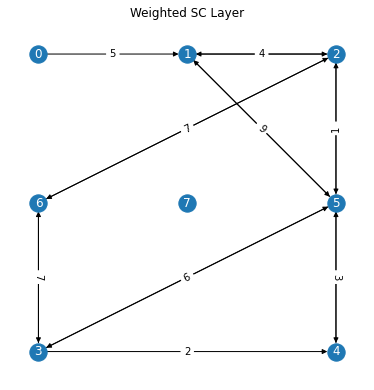

In [7]:
G = nx.from_numpy_array(brain.sc * brain.sc_bin, create_using=nx.DiGraph)
plt.figure(figsize=(5,5))
pos = {0:(0,2),1:(1,2),2:(2,2),3:(0,0),4:(2,0),5:(2,1),6:(0,1),7:(1,1)}
nx.draw(G, pos=pos, with_labels=True, font_color='white')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Weighted SC Layer")
plt.show()

## Single paths

In [8]:
pp.retrieve_single_path(source=2, target=3, method='fwd', out_path=True)

In [9]:
pp.retrieve_single_path(source=2, target=3, method='fwd', out_path=False)

inf

In [10]:
pp.retrieve_single_path(source=2, target=1, method='back', out_path=True)

[2, 5, 1]

In [11]:
pp.retrieve_single_path(source=6, target=1, method='back', out_path=False)

2

### All paths

In [12]:
pp.retrieve_all_paths(method='rev', out_path=True)

{0: {1: [0, 1], 2: None, 3: None, 4: None, 5: [0, 1, 5], 6: None, 7: None},
 1: {0: None, 2: None, 3: None, 4: None, 5: [1, 5], 6: None, 7: None},
 2: {0: None, 1: [2, 5, 1], 3: None, 4: None, 5: [2, 5], 6: None, 7: None},
 3: {0: None, 1: [3, 5, 1], 2: None, 4: None, 5: [3, 5], 6: None, 7: None},
 4: {0: None, 1: [4, 5, 1], 2: None, 3: None, 5: [4, 5], 6: None, 7: None},
 5: {0: None, 1: [5, 1], 2: None, 3: None, 4: None, 6: None, 7: None},
 6: {0: None,
  1: [6, 2, 5, 1],
  2: [6, 2],
  3: None,
  4: None,
  5: [6, 2, 5],
  7: None},
 7: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None}}

In [13]:
pp.retrieve_all_paths(method='rev', out_path=False)

array([[ 0.,  1., inf, inf, inf,  2., inf, inf],
       [inf,  0., inf, inf, inf,  1., inf, inf],
       [inf,  2.,  0., inf, inf,  1., inf, inf],
       [inf,  2., inf,  0., inf,  1., inf, inf],
       [inf,  2., inf, inf,  0.,  1., inf, inf],
       [inf,  1., inf, inf, inf,  0., inf, inf],
       [inf,  3.,  1., inf, inf,  2.,  0., inf],
       [inf, inf, inf, inf, inf, inf, inf,  0.]])

In [14]:
pp.retrieve_all_paths(method='fwd', out_path=True)

{0: {1: [0, 1],
  2: [0, 1, 5, 3, 6, 2],
  3: [0, 1, 5, 3],
  4: None,
  5: [0, 1, 5],
  6: [0, 1, 5, 3, 6],
  7: None},
 1: {0: None,
  2: [1, 5, 3, 6, 2],
  3: [1, 5, 3],
  4: None,
  5: [1, 5],
  6: [1, 5, 3, 6],
  7: None},
 2: {0: None, 1: [2, 5, 1], 3: None, 4: None, 5: [2, 5], 6: None, 7: None},
 3: {0: None,
  1: [3, 5, 1],
  2: [3, 5, 1, 2],
  4: None,
  5: [3, 5],
  6: [3, 5, 1, 2, 6],
  7: None},
 4: {0: None,
  1: [4, 5, 1],
  2: [4, 5, 1, 2],
  3: [4, 5, 1, 2, 6, 3],
  5: [4, 5],
  6: [4, 5, 1, 2, 6],
  7: None},
 5: {0: None,
  1: [5, 1],
  2: [5, 1, 2],
  3: [5, 1, 2, 6, 3],
  4: [5, 1, 2, 6, 3, 4],
  6: [5, 1, 2, 6],
  7: None},
 6: {0: None,
  1: [6, 2, 1],
  2: [6, 2],
  3: [6, 2, 1, 5, 3],
  4: [6, 2, 1, 5, 3, 4],
  5: [6, 2, 1, 5],
  7: None},
 7: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None}}

In [15]:
pp.retrieve_all_paths(method='fwd', out_path=False)

array([[ 0.,  1.,  5.,  3., inf,  2.,  4., inf],
       [inf,  0.,  4.,  2., inf,  1.,  3., inf],
       [inf,  2.,  0., inf, inf,  1., inf, inf],
       [inf,  2.,  3.,  0., inf,  1.,  4., inf],
       [inf,  2.,  3.,  5.,  0.,  1.,  4., inf],
       [inf,  1.,  2.,  4.,  5.,  0.,  3., inf],
       [inf,  2.,  1.,  4.,  5.,  3.,  0., inf],
       [inf, inf, inf, inf, inf, inf, inf,  0.]])

In [16]:
pp.retrieve_all_paths(method='back', out_path=True)

{0: {1: [0, 1],
  2: [0, 1, 5, 3, 6, 2],
  3: [0, 1, 5, 3],
  4: [0, 1, 5, 3, 4],
  5: [0, 1, 5],
  6: [0, 1, 5, 3, 6],
  7: None},
 1: {0: None,
  2: [1, 5, 3, 6, 2],
  3: [1, 5, 3],
  4: [1, 5, 3, 4],
  5: [1, 5],
  6: [1, 5, 3, 6],
  7: None},
 2: {0: None,
  1: [2, 5, 1],
  3: [2, 5, 3],
  4: [2, 5, 3, 4],
  5: [2, 5],
  6: [2, 5, 3, 6],
  7: None},
 3: {0: None,
  1: [3, 5, 1],
  2: [3, 5, 1, 2],
  4: [3, 5, 4],
  5: [3, 5],
  6: [3, 5, 1, 2, 6],
  7: None},
 4: {0: None,
  1: [4, 5, 1],
  2: [4, 5, 1, 2],
  3: [4, 5, 1, 2, 6, 3],
  5: [4, 5],
  6: [4, 5, 1, 2, 6],
  7: None},
 5: {0: None,
  1: [5, 1],
  2: [5, 1, 2],
  3: [5, 1, 2, 6, 3],
  4: [5, 1, 2, 6, 3, 4],
  6: [5, 1, 2, 6],
  7: None},
 6: {0: None,
  1: [6, 2, 1],
  2: [6, 2],
  3: [6, 2, 1, 5, 3],
  4: [6, 2, 1, 5, 3, 4],
  5: [6, 2, 1, 5],
  7: None},
 7: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None}}

In [17]:
pp.retrieve_all_paths(method='back', out_path=False)

array([[ 0.,  1.,  5.,  3.,  4.,  2.,  4., inf],
       [inf,  0.,  4.,  2.,  3.,  1.,  3., inf],
       [inf,  2.,  0.,  2.,  3.,  1.,  3., inf],
       [inf,  2.,  3.,  0.,  2.,  1.,  4., inf],
       [inf,  2.,  3.,  5.,  0.,  1.,  4., inf],
       [inf,  1.,  2.,  4.,  5.,  0.,  3., inf],
       [inf,  2.,  1.,  4.,  5.,  3.,  0., inf],
       [inf, inf, inf, inf, inf, inf, inf,  0.]])